StudentId: 16340040

Name: Chen Xiujia

# Assignment 1

(0.0, 0.0079365158)
(1.0, 1.1603174)
(2.0, 0.97936493)
(3.0, 0.12063507)
(4.0, -0.76031774)
(5.0, -1.0079377)


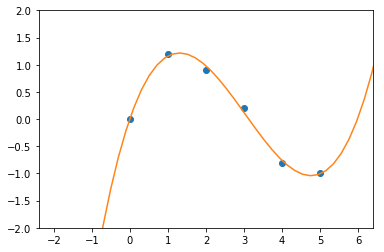

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

xs = torch.load('xs.pt').numpy()
ys = torch.load('ys.pt').numpy()

f = np.poly1d(np.polyfit(xs, ys, 3))
x = np.linspace(-10, 10, 100)
fdot = f(xs)

for i in range(6):
    print((xs[i], fdot[i]))
torch.save(torch.from_numpy(fdot), 'y.pt')

plt.plot(x, f(x), color='#ff8419')
plt.scatter(xs, ys)
plt.xlim(-2.4, 6.4)
plt.ylim(-2, 2)
plt.show()

Check if save operating is right.

In [3]:
print(torch.load('y.pt'))

tensor([ 0.0079,  1.1603,  0.9794,  0.1206, -0.7603, -1.0079])


# Question 1

In [4]:
import torch

x = torch.arange(10.0, 50.0)
print(x)
print(torch.max(x))
print(torch.min(x))

tensor([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,
        24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.,
        38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])
tensor(49.)
tensor(10.)


# Question 2

In [5]:
import torch

def cnn(channels, filters):
    if type(channels) is not list or type(filters) is not list:
        raise ValueError("arguments should be list")
    if len(channels) != len(filters):
        raise ValueError("arguments should have the same length")
    if len(channels) == 0:
        return torch.Tensor(0, 0)
    for i in range(len(channels)):
        if type(channels[i]) is not torch.Tensor \
            or type(filters[i]) is not torch.Tensor:
            raise ValueError("channel and filter should be tensor.Tensor")
        if i == 0:
            (cx, cy) = channels[0].size()
            (fx, fy) = filters[0].size()
            if cx < fx or cy < fy:
                raise ValueError("channel's size should be larger than filter's")
            res = torch.zeros([cx - fx + 1, cy - fy + 1])
        elif channels[i].size() != channels[0].size() \
            or filters[i].size() != filters[0].size():
            raise ValueError("channels or filters should be the same size")
        for j in range(res.size()[0]):
            for k in range(res.size()[1]):
                res[j, k] += ((channels[i])[j:j+fx, k:k+fy] * filters[i]).sum()
    return res

Test the funtion `cnn`.

In [6]:
def test(channels, filters, error=None, result=None):
    try:
        res = cnn(channels, filters)
    except ValueError as err:
        if str(err) == error:
            print("OK:", err)
        else:
            print("Error:", err)
    else:
        if torch.equal(res, result):
            print("OK:", res)
        else:
            print("Error:", res, result)

mat1 = [
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 2, 1, 0],
    [0, 0, 2, 1, 0, 1, 0],
    [0, 1, 1, 0, 2, 0, 0],
    [0, 2, 2, 1, 1, 0, 0],
    [0, 2, 0, 1, 2, 0, 0],
    [0, 0, 0, 0, 0, 0, 0]
]

mat2 = [
    [0, 0, 0, 0, 0, 0, 0],
    [0, 2, 0, 2, 1, 1, 0],
    [0, 0, 1, 0, 0, 2, 0],
    [0, 1, 0, 0, 2, 1, 0],
    [0, 1, 1, 2, 1, 0, 0],
    [0, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]
]

res = [
    [2, 0, 2, 4, 0],
    [1, 4, 4, 3, 5],
    [4, 3, 5, 9, -1],
    [3, 4, 6, 2, 1],
    [5, 3, 5, 1, -2]
]

channel1 = torch.tensor(mat1, dtype=torch.float)
channel2 = torch.tensor(mat2, dtype=torch.float)
res_channel = torch.tensor(res, dtype=torch.float)
filter1 = torch.tensor([[1, 0, 1], [-1, 1, 0], [0, -1, 0]], dtype=torch.float)
filter2 = torch.tensor([[-1, 0, 1], [0, 0, 1], [1, 1, 1]], dtype=torch.float)

test(None, None, error="arguments should be list")
test([], [torch.empty(1, 1)], error="arguments should have the same length")
test([], [], result=torch.empty(0, 0))
test([mat1, channel2], [filter1, filter2],
     error="channel and filter should be tensor.Tensor")
test([channel1, filter1], [channel2, filter2], 
     error="channels or filters should be the same size")
test([filter1, filter2], [channel1, channel2], 
     error="channel's size should be larger than filter's")
test([channel1, channel2], [filter1, filter2], result=res_channel)

OK: arguments should be list
OK: arguments should have the same length
OK: tensor([], size=(0, 0))
OK: channel and filter should be tensor.Tensor
OK: channels or filters should be the same size
OK: channel's size should be larger than filter's
OK: tensor([[ 2.,  0.,  2.,  4.,  0.],
        [ 1.,  4.,  4.,  3.,  5.],
        [ 4.,  3.,  5.,  9., -1.],
        [ 3.,  4.,  6.,  2.,  1.],
        [ 5.,  3.,  5.,  1., -2.]])


Get the result.

In [7]:
print(cnn([channel1, channel2], [filter1, filter2]))

tensor([[ 2.,  0.,  2.,  4.,  0.],
        [ 1.,  4.,  4.,  3.,  5.],
        [ 4.,  3.,  5.,  9., -1.],
        [ 3.,  4.,  6.,  2.,  1.],
        [ 5.,  3.,  5.,  1., -2.]])
